In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import pymc as pm
import re
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dir = "./drive/MyDrive/Data102Project"

# Import datasets

In [ ]:
players = pd.read_csv(dir + "/NBA_players.csv", index_col=0)
players

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,42,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,34,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,12,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,7,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,22,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,1,3,...,33.1,10.2,4.2,8.8,0.057,0.243,0.370,0.655,0.233,2022-23
12840,John Butler Jr.,POR,20.0,213.36,86.182480,Florida State,USA,Undrafted,Undrafted,Undrafted,...,2.4,0.9,0.6,-16.1,0.012,0.065,0.102,0.411,0.066,2022-23
12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,1,19,...,13.1,6.5,1.2,-0.2,0.035,0.180,0.168,0.593,0.052,2022-23
12842,Jericho Sims,NYK,24.0,208.28,113.398000,Texas,USA,2021,2,58,...,3.4,4.7,0.5,-6.7,0.117,0.175,0.074,0.780,0.044,2022-23


In [ ]:
display(players.columns)
players[players["player_name"].isnull()]

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,draft_number,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season


In [ ]:
season_stats = pd.read_csv(dir + "/Seasons_Stats.csv", index_col=0)
season_stats.drop(columns=["blanl", "blank2"], inplace=True)
season_stats

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0


In [ ]:
free_throws = pd.read_csv(dir + "/free_throws.csv")
free_throws

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18
...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2015 - 2016,1,0:53
618015,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2015 - 2016,1,0:53
618016,104 - 118,DAL - OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2015 - 2016,1,0:27
618017,104 - 118,DAL - OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2015 - 2016,0,0:26


In [ ]:
free_throws[free_throws["player"].isnull()]

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time


# Clean/transform players and join with their season-wise stats

In [ ]:
players = players[['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'season']]

players["season"] = players["season"].apply(lambda x: x[:2] + x[-2:]).astype(int)

players = players[players["draft_year"] != "Undrafted"]
players["draft_year"] = players["draft_year"].apply(lambda x: x[0:4]).astype(int)

players["exp"] = players["season"] - players["draft_year"]

players

<ipython-input-208-ee2b6815425d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players["season"] = players["season"].apply(lambda x: x[:2] + x[-2:]).astype(int)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,season,exp
0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,1997,1
1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,1997,3
2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1997,4
3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1997,8
4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1997,2
...,...,...,...,...,...,...,...,...,...,...
12836,Joe Harris,BKN,31.0,198.12,99.790240,Virginia,USA,2014,2023,9
12838,Joe Wieskamp,TOR,23.0,198.12,92.986360,Iowa,USA,2021,2023,2
12839,Joel Embiid,PHI,29.0,213.36,127.005760,Kansas,Cameroon,2014,2023,9
12841,John Collins,ATL,25.0,205.74,102.511792,Wake Forest,USA,2017,2023,6


In [ ]:
season_stats = season_stats.rename(columns={"Player":"player_name", "Age":"age", "Tm":"team_abbreviation"})
players_season_stats = players.merge(season_stats, on=["player_name", "age", "team_abbreviation"])
players_season_stats

,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,season,exp,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1997,4,...,0.619,98.0,163.0,261.0,76.0,63.0,17.0,64.0,97.0,342.0
1,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1997,2,...,0.800,10.0,13.0,23.0,5.0,1.0,0.0,4.0,17.0,52.0
2,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,1997,12,...,0.716,59.0,114.0,173.0,173.0,54.0,12.0,123.0,144.0,848.0
3,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1997,8,...,0.849,89.0,264.0,353.0,182.0,77.0,22.0,182.0,200.0,1826.0
4,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1997,3,...,0.791,130.0,372.0,502.0,248.0,103.0,68.0,269.0,225.0,1689.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,Georgios Papagiannis,SAC,19.0,215.90,108.862080,None,Greece,2016,2017,1,...,0.857,24.0,62.0,86.0,20.0,3.0,17.0,24.0,44.0,124.0
5795,Giannis Antetokounmpo,MIL,22.0,210.82,100.697424,None,Greece,2013,2017,4,...,0.770,142.0,558.0,700.0,434.0,131.0,151.0,234.0,246.0,1832.0
5796,Gerald Henderson,PHI,29.0,195.58,97.522280,Duke,USA,2009,2017,8,...,0.806,34.0,151.0,185.0,112.0,41.0,15.0,62.0,129.0,662.0
5797,Gerald Green,BOS,31.0,200.66,92.986360,None,USA,2005,2017,12,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0


In [ ]:
'''
# MOVED TO DURING BIG MERGE WITH free_throws

# Get the previous stats

players_season_stats = players_season_stats.sort_values(by=["player_name", "season"])

player_grouped = players_season_stats.groupby('player_name')
all_stats = players_season_stats.columns[1:]

for stat in all_stats:
    players_season_stats[f'prev_{stat}'] = player_grouped[stat].shift()

players_season_stats
'''

'\n# MOVED TO DURING BIG MERGE WITH free_throws\n\n# Get the previous stats\n\nplayers_season_stats = players_season_stats.sort_values(by=["player_name", "season"])\n\nplayer_grouped = players_season_stats.groupby(\'player_name\')\nall_stats = players_season_stats.columns[1:]\n\nfor stat in all_stats:\n    players_season_stats[f\'prev_{stat}\'] = player_grouped[stat].shift()\n\nplayers_season_stats\n'

In [ ]:
'''
# MOVED TO DURING BIG MERGE WITH free_throws

players_season_stats = players_season_stats.drop(columns=["prev_season"])
players_season_stats = players_season_stats.reset_index(drop=True)

# drop rows with no previous stats
players_season_stats = players_season_stats.dropna()

players_season_stats
'''

'\n# MOVED TO DURING BIG MERGE WITH free_throws\n\nplayers_season_stats = players_season_stats.drop(columns=["prev_season"])\nplayers_season_stats = players_season_stats.reset_index(drop=True)\n\n# drop rows with no previous stats\nplayers_season_stats = players_season_stats.dropna()\n\nplayers_season_stats\n'

In [ ]:
players_season_stats.columns

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'season', 'exp',
       'Year', 'Pos', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr', 'ORB%',
       'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS',
       'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [ ]:
col_to_join = 'player_name'
player_qual_vars = ["team_abbreviation", "college", "country", "Pos"]
player_quant_vars = list(set(list(players_season_stats.columns)) - set(player_qual_vars + [col_to_join]))
assert(set(player_qual_vars + player_quant_vars + [col_to_join]) == set(players_season_stats.columns))
player_quant_vars

['WS',
 'TOV',
 'FT',
 'USG%',
 'OBPM',
 'BLK',
 'FTr',
 'eFG%',
 'STL%',
 'BLK%',
 'ORB%',
 'PTS',
 '3PA',
 '2PA',
 'PF',
 'TS%',
 'DBPM',
 'G',
 'season',
 'FTA',
 'ORB',
 'draft_year',
 'AST%',
 'DWS',
 'Year',
 'TRB%',
 'player_height',
 '3P%',
 'FGA',
 '2P%',
 'AST',
 'GS',
 'DRB%',
 'TOV%',
 'age',
 'VORP',
 'STL',
 'player_weight',
 'BPM',
 'PER',
 'exp',
 '3P',
 'FG%',
 'MP',
 'WS/48',
 'DRB',
 '2P',
 'OWS',
 'FG',
 'FT%',
 'TRB',
 '3PAr']

In [ ]:
players_season_stats = players_season_stats.dropna()
players_season_stats[player_quant_vars] = players_season_stats[player_quant_vars].apply(pd.to_numeric)
players_season_stats

<ipython-input-214-35d89d2dc968>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_season_stats[player_quant_vars] = players_season_stats[player_quant_vars].apply(pd.to_numeric)


,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,season,exp,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1997,4,...,0.619,98.0,163.0,261.0,76.0,63.0,17.0,64.0,97.0,342.0
2,Gerald Wilkins,ORL,33.0,198.12,102.058200,Tennessee-Chattanooga,USA,1985,1997,12,...,0.716,59.0,114.0,173.0,173.0,54.0,12.0,123.0,144.0,848.0
3,Glen Rice,CHH,30.0,203.20,99.790240,Michigan,USA,1989,1997,8,...,0.849,89.0,264.0,353.0,182.0,77.0,22.0,182.0,200.0,1826.0
4,Glenn Robinson,MIL,24.0,200.66,106.594120,Purdue,USA,1994,1997,3,...,0.791,130.0,372.0,502.0,248.0,103.0,68.0,269.0,225.0,1689.0
5,Grant Hill,DET,24.0,203.20,102.058200,Duke,USA,1994,1997,3,...,0.711,123.0,598.0,721.0,583.0,144.0,48.0,259.0,186.0,1710.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5794,Georgios Papagiannis,SAC,19.0,215.90,108.862080,None,Greece,2016,2017,1,...,0.857,24.0,62.0,86.0,20.0,3.0,17.0,24.0,44.0,124.0
5795,Giannis Antetokounmpo,MIL,22.0,210.82,100.697424,None,Greece,2013,2017,4,...,0.770,142.0,558.0,700.0,434.0,131.0,151.0,234.0,246.0,1832.0
5796,Gerald Henderson,PHI,29.0,195.58,97.522280,Duke,USA,2009,2017,8,...,0.806,34.0,151.0,185.0,112.0,41.0,15.0,62.0,129.0,662.0
5797,Gerald Green,BOS,31.0,200.66,92.986360,None,USA,2005,2017,12,...,0.805,17.0,68.0,85.0,33.0,9.0,7.0,25.0,48.0,262.0


In [ ]:
'''
# MOVED TO AFTER BIG MERGE WITH free_throws

# One hot encode all qualitative variables
# qual_vars = ["player_name", "Pos", "team_abbreviation", "college", "country"]
# qual_vars = ["player_name", "Pos", "team_abbreviation", "college", "country", "prev_Pos", "prev_team_abbreviation", "prev_college", "prev_country"]
ohe = OneHotEncoder()
encoded = ohe.fit_transform(players_season_stats[["player_name", "Pos", "team_abbreviation", "college", "country"]]).toarray()
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
encoded_df = encoded_df.dropna()

players_season_stats = players_season_stats.join(encoded_df).drop(columns=["Pos", "team_abbreviation", "college", "country"])
players_season_stats
'''

'\n# MOVED TO AFTER BIG MERGE WITH free_throws\n\n# One hot encode all qualitative variables\n# qual_vars = ["player_name", "Pos", "team_abbreviation", "college", "country"]\n# qual_vars = ["player_name", "Pos", "team_abbreviation", "college", "country", "prev_Pos", "prev_team_abbreviation", "prev_college", "prev_country"]\nohe = OneHotEncoder()\nencoded = ohe.fit_transform(players_season_stats[["player_name", "Pos", "team_abbreviation", "college", "country"]]).toarray()\nencoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())\nencoded_df = encoded_df.dropna()\n\nplayers_season_stats = players_season_stats.join(encoded_df).drop(columns=["Pos", "team_abbreviation", "college", "country"])\nplayers_season_stats\n'

# Clean/transform free_throws

In [ ]:
free_throws["num_throws"] = free_throws["play"].str[-1]
free_throws

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,num_throws
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45,2
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45,2
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26,2
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26,2
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2015 - 2016,1,0:53,2
618015,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2015 - 2016,1,0:53,2
618016,104 - 118,DAL - OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2015 - 2016,1,0:27,w
618017,104 - 118,DAL - OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2015 - 2016,0,0:26,2


In [ ]:
free_throws[~free_throws["num_throws"].isin(["1","2","3","w"])]

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,num_throws
377163,100 - 107,TOR - BKN,400277749.0,4.0,Ed Davis makes free throw 2 of 2. Kris Humphri...,Ed Davis,regular,81 - 84,2012 - 2013,1,10:27,s
388288,108 - 104,CHI - DET,400277994.0,1.0,Jason Maxiell makes 2 free throws,Jason Maxiell,regular,22 - 28,2012 - 2013,1,0:52,s
396857,110 - 93,BKN - OKC,400278192.0,4.0,Joe Johnson makes two free throws,Joe Johnson,regular,85 - 79,2012 - 2013,1,8:33,s
430457,87 - 110,MIL - MIA,400459775.0,2.0,Shane Battier makes 2 of 2 free throws,Shane Battier,playoffs,34 - 40,2012 - 2013,1,4:13,s


In [ ]:
# free_throws.iloc[377163]["play"]

In [ ]:
free_throws["num_throws"] = free_throws["num_throws"].replace('w', '1')
#free_throws["num_throws"] = free_throws["num_throws"].replace('s', '2')
free_throws = free_throws.drop(free_throws[free_throws["num_throws"] == 's'].index)
free_throws

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,num_throws
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45,2
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45,2
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26,2
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26,2
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2015 - 2016,1,0:53,2
618015,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2015 - 2016,1,0:53,2
618016,104 - 118,DAL - OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2015 - 2016,1,0:27,1
618017,104 - 118,DAL - OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2015 - 2016,0,0:26,2


In [ ]:
# check all w are 1 technical ft
free_throws[(free_throws["num_throws"] == "1") & (free_throws["shot_made"] > 1)]
# check all s are 2 technical fts
free_throws[(free_throws["num_throws"] == "2") & (free_throws["shot_made"] > 2)]

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,num_throws


In [ ]:
# change to int
free_throws["num_throws"] = free_throws["num_throws"].astype(int)
free_throws

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,num_throws
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2006 - 2007,1,11:45,2
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2006 - 2007,1,11:45,2
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,1,7:26,2
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2006 - 2007,0,7:26,2
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2006 - 2007,1,7:18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2015 - 2016,1,0:53,2
618015,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2015 - 2016,1,0:53,2
618016,104 - 118,DAL - OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2015 - 2016,1,0:27,1
618017,104 - 118,DAL - OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2015 - 2016,0,0:26,2


In [ ]:
free_throws["season"] = free_throws["season"].apply(lambda x: x[-4:]).astype(int)
free_throws

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,num_throws
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2007,1,11:45,2
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2007,1,11:45,2
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2007,1,7:26,2
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2007,0,7:26,2
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2007,1,7:18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2016,1,0:53,2
618015,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2016,1,0:53,2
618016,104 - 118,DAL - OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2016,1,0:27,1
618017,104 - 118,DAL - OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2016,0,0:26,2


In [ ]:
# handle the rows where there are multiple technical throws at the same time and game instead of total number of free throws
temp = free_throws[free_throws["play"].str[-1] == "w"]
temp

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,num_throws
62,108 - 66,CHI - MIA,261031014.0,2.0,Dwyane Wade makes technical free throw,Dwyane Wade,regular,26 - 17,2007,1,11:10,1
66,108 - 66,CHI - MIA,261031014.0,2.0,Dwyane Wade misses technical free throw,Dwyane Wade,regular,42 - 25,2007,0,4:46,1
68,108 - 66,CHI - MIA,261031014.0,2.0,Ben Gordon misses technical free throw,Ben Gordon,regular,47 - 25,2007,0,3:42,1
73,108 - 66,CHI - MIA,261031014.0,2.0,Gary Payton misses technical free throw,Gary Payton,regular,57 - 28,2007,0,0:30,1
89,108 - 66,CHI - MIA,261031014.0,4.0,Jason Kapono makes technical free throw,Jason Kapono,regular,93 - 62,2007,1,6:03,1
...,...,...,...,...,...,...,...,...,...,...,...,...
617839,85 - 84,DAL - OKC,400874365.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,79 - 79,2016,1,3:20,1
617962,119 - 108,OKC - DAL,400874367.0,4.0,Wesley Matthews makes technical free throw,Wesley Matthews,playoffs,119 - 108,2016,1,0:20,1
617967,104 - 118,DAL - OKC,400874368.0,1.0,Dirk Nowitzki makes technical free throw,Dirk Nowitzki,playoffs,11 - 19,2016,1,6:01,1
618012,104 - 118,DAL - OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 112,2016,1,2:48,1


In [ ]:
duplicates = temp.groupby(["game_id", "play", "time"]).transform("size") > 1
temp = temp[duplicates]
temp

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,num_throws
388,83 - 92,SAC - MIN,261101016.0,4.0,Marko Jaric makes free throw,Marko Jaric,regular,66 - 67,2007,1,10:49,1
389,83 - 92,SAC - MIN,261101016.0,4.0,Marko Jaric makes free throw,Marko Jaric,regular,66 - 68,2007,1,10:49,1
397,83 - 92,SAC - MIN,261101016.0,4.0,Kevin Garnett makes technical free throw,Kevin Garnett,regular,77 - 84,2007,1,2:51,1
398,83 - 92,SAC - MIN,261101016.0,4.0,Kevin Garnett makes technical free throw,Kevin Garnett,regular,77 - 85,2007,1,2:51,1
2407,98 - 107,MIA - PHI,261105020.0,4.0,Allen Iverson makes free throw,Allen Iverson,regular,75 - 85,2007,1,10:11,1
...,...,...,...,...,...,...,...,...,...,...,...,...
606111,100 - 107,MEM - LAL,400828942.0,4.0,Jordan Farmar makes technical free throw,Jordan Farmar,regular,81 - 83,2016,1,10:45,1
609020,111 - 120,WSH - SAC,400829007.0,4.0,John Wall makes technical free throw,John Wall,regular,107 - 120,2016,1,0:06,1
609022,111 - 120,WSH - SAC,400829007.0,4.0,John Wall makes technical free throw,John Wall,regular,108 - 120,2016,1,0:06,1
611219,111 - 97,CHA - NY,400829056.0,4.0,Kemba Walker makes technical free throw,Kemba Walker,regular,99 - 86,2016,1,3:31,1


In [ ]:
# drop the "duplicate" rows
free_throws = free_throws.drop(temp.index)
free_throws

,end_result,game,game_id,period,play,player,playoffs,score,season,shot_made,time,num_throws
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2007,1,11:45,2
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2007,1,11:45,2
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2007,1,7:26,2
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2007,0,7:26,2
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2007,1,7:18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2016,1,0:53,2
618015,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2016,1,0:53,2
618016,104 - 118,DAL - OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2016,1,0:27,1
618017,104 - 118,DAL - OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2016,0,0:26,2


In [ ]:
free_throws = free_throws.rename(columns={"player": "player_name"})
free_throws

,end_result,game,game_id,period,play,player_name,playoffs,score,season,shot_made,time,num_throws
0,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2007,1,11:45,2
1,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2007,1,11:45,2
2,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2007,1,7:26,2
3,106 - 114,PHX - LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2007,0,7:26,2
4,106 - 114,PHX - LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2007,1,7:18,1
...,...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2016,1,0:53,2
618015,104 - 118,DAL - OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2016,1,0:53,2
618016,104 - 118,DAL - OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2016,1,0:27,1
618017,104 - 118,DAL - OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2016,0,0:26,2


In [ ]:
free_throws['game_team1'], free_throws['game_team2'] = zip(*free_throws['game'].map(lambda teams: teams.replace(" ", "").split("-")))
free_throws.insert(2, 'game_team1', free_throws.pop('game_team1'))
free_throws.insert(3, 'game_team2', free_throws.pop('game_team2'))
free_throws

,end_result,game,game_team1,game_team2,game_id,period,play,player_name,playoffs,score,season,shot_made,time,num_throws
0,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2007,1,11:45,2
1,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2007,1,11:45,2
2,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2007,1,7:26,2
3,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2007,0,7:26,2
4,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2007,1,7:18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2016,1,0:53,2
618015,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2016,1,0:53,2
618016,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2016,1,0:27,1
618017,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2016,0,0:26,2


In [ ]:
freethrows_group = free_throws.groupby(["player_name", "game_id", "game_team1", "game_team2", "time", "num_throws", "period", "playoffs"]).agg({"shot_made" : "sum"}).rename(columns={"num_throws": "num_FT_attempted", "shot_made": "num_FT_made"})
freethrows_group

num_FT_made
player_name        game_id     game_team1 game_team2 time  num_throws period playoffs             
A.J. Price         291111011.0 GS         IND        9:14  2          4.0    regular             1
                   291122030.0 IND        CHA        0:48  1          4.0    regular             1
                   291216011.0 CHA        IND        7:33  1          2.0    regular             1
                   291226011.0 ATL        IND        0:40  2          4.0    regular             2
                   291227014.0 IND        MIA        7:54  1          4.0    regular             0
...                                                                                            ...
Zydrunas Ilgauskas 310413028.0 MIA        TOR        3:56  2          1.0    regular             2
                                                     5:03  2          1.0    regular             1
                   310418014.0 PHI        MIA        11:11 2          1.0    playoffs            1
                                                     5:35  2          3.0    playoffs            2
                   310424020.0 MIA        PHI        11:03 2          3.0    playoffs            1

[343635 rows x 1 columns]

In [ ]:
'''
# not using this for now

#First table that from the PDF file.
freethrows_group_index = freethrows_group.reset_index()
freethrows_group_index ["simp_pct"] = freethrows_group_index ["num_FT_made"]/freethrows_group_index ["num_throws"]
freethrows_group_index
'''

'\n# not using this for now\n\n#First table that from the PDF file.\nfreethrows_group_index = freethrows_group.reset_index()\nfreethrows_group_index ["simp_pct"] = freethrows_group_index ["num_FT_made"]/freethrows_group_index ["num_throws"]\nfreethrows_group_index\n'

In [ ]:
def parse_index(play_str, num_throws):
  if num_throws == 1:
    return 1
  play_str = re.sub("[^0-9]", " ", play_str)
  return play_str.split()[0]

free_throws["throw_index"] = free_throws.apply(lambda x: parse_index(x["play"], x["num_throws"]), axis=1).astype(int)
free_throws

,end_result,game,game_team1,game_team2,game_id,period,play,player_name,playoffs,score,season,shot_made,time,num_throws,throw_index
0,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2007,1,11:45,2,1
1,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2007,1,11:45,2,2
2,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2007,1,7:26,2,1
3,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2007,0,7:26,2,2
4,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Shawn Marion makes free throw 1 of 1,Shawn Marion,regular,21 - 12,2007,1,7:18,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618014,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2016,1,0:53,2,1
618015,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2016,1,0:53,2,2
618016,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Kevin Durant makes technical free throw,Kevin Durant,playoffs,103 - 118,2016,1,0:27,1,1
618017,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2016,0,0:26,2,1


In [ ]:
# imported from Joshua's notebook

free_throws = free_throws[free_throws['num_throws']==2]

#Add '1of2' columns. Assigned 1.0 if this free throw is 1 of 2 free throw and made it and assigned 0.0 if they miss. If it is not one of those two condition, assinged as NaN.
free_throws['1of2'] = np.where((free_throws['play'].str.contains('1 of 2')) & (free_throws['shot_made'] == 1) & (free_throws['num_throws'] == 2),
                               True,
                               np.where((free_throws['play'].str.contains('1 of 2')) & (free_throws['shot_made'] == 0) & (free_throws['num_throws'] == 2),
                                        False,
                                        np.nan))

#Add '2of2' columns. Assigned 1.0 if this free throw is 2 of 2 free throw and made it and assigned 0.0 if they miss. If it is not one of those two condition, assinged as NaN.
free_throws['2of2'] = np.where((free_throws['play'].str.contains('2 of 2')) & (free_throws['shot_made'] == 1) & (free_throws['num_throws'] == 2),
                               True,
                               np.where((free_throws['play'].str.contains('2 of 2')) & (free_throws['shot_made'] == 0) & (free_throws['num_throws'] == 2),
                                        False,
                                        np.nan))

free_throws

<ipython-input-231-f83c811fd0cd>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_throws['1of2'] = np.where((free_throws['play'].str.contains('1 of 2')) & (free_throws['shot_made'] == 1) & (free_throws['num_throws'] == 2),
<ipython-input-231-f83c811fd0cd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_throws['2of2'] = np.where((free_throws['play'].str.contains('2 of 2')) & (free_throws['shot_made'] == 1) & (free_throws['num_throws'] == 2),


,end_result,game,game_team1,game_team2,game_id,period,play,player_name,playoffs,score,season,shot_made,time,num_throws,throw_index,1of2,2of2
0,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2007,1,11:45,2,1,1.0,NaN
1,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2007,1,11:45,2,2,NaN,1.0
2,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,18 - 12,2007,1,7:26,2,1,1.0,NaN
3,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2007,0,7:26,2,2,NaN,0.0
5,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Amare Stoudemire makes free throw 1 of 2,Amare Stoudemire,regular,33 - 20,2007,1,3:15,2,1,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618011,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Russell Westbrook makes free throw 2 of 2,Russell Westbrook,playoffs,98 - 103,2016,1,6:56,2,2,NaN,1.0
618014,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Randy Foye makes free throw 1 of 2,Randy Foye,playoffs,103 - 116,2016,1,0:53,2,1,1.0,NaN
618015,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Randy Foye makes free throw 2 of 2,Randy Foye,playoffs,103 - 117,2016,1,0:53,2,2,NaN,1.0
618017,104 - 118,DAL - OKC,DAL,OKC,400874368.0,4.0,Dwight Powell misses free throw 1 of 2,Dwight Powell,playoffs,103 - 118,2016,0,0:26,2,1,0.0,NaN


In [ ]:
# imported from Joshua's notebook ("option c")

#Group by each set of two free throws
free_throws['previous_throw'] = free_throws.groupby(['game', 'game_id', 'period', 'player_name', 'playoffs', 'season', 'time'])['1of2'].transform('first')

#Done with "preivous_throw" column
free_throws_filtered = free_throws[~free_throws['play'].str.contains('1 of 2')]

temp1 = free_throws.sort_values(by = ['game_id','player_name', 'period', 'time'])

shotmade = temp1[["shot_made"]]
shotmade_duplicated = shotmade.iloc[::2]
shotmade_second = shotmade.iloc[1::2]
shotmade_duplicated["shot_made2"] = shotmade_second.values

output_df = pd.DataFrame(np.repeat(shotmade_duplicated.values, 2, axis=0), columns=shotmade_duplicated.columns)
output_df = output_df.rename(columns={'shot_made':'shot_made1'})

# duplicate every row after the other, and then group by and then shift

temp1_1 = temp1.reset_index()
temp1_1 = pd.concat([temp1_1, output_df], axis = 1)
temp1_1['shot_made1'] = temp1_1.groupby(['player_name', 'game_id'])['shot_made1'].shift(periods=2)
temp1_1['shot_made2'] = temp1_1.groupby(['player_name', 'game_id'])['shot_made2'].shift(periods=2)

temp1_1 = temp1_1.drop(columns=['previous_throw'])
free_throws = temp1_1.rename(columns={'shot_made1':'prev_shot1_made', 'shot_made2':'prev_shot2_made'})



<ipython-input-232-fbb29e2e8e1c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  free_throws['previous_throw'] = free_throws.groupby(['game', 'game_id', 'period', 'player_name', 'playoffs', 'season', 'time'])['1of2'].transform('first')
<ipython-input-232-fbb29e2e8e1c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shotmade_duplicated["shot_made2"] = shotmade_second.values


In [ ]:
free_throws

,index,end_result,game,game_team1,game_team2,game_id,period,play,player_name,playoffs,score,season,shot_made,time,num_throws,throw_index,1of2,2of2,prev_shot1_made,prev_shot2_made
0,5,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Amare Stoudemire makes free throw 1 of 2,Amare Stoudemire,regular,33 - 20,2007,1,3:15,2,1,1.0,NaN,NaN,NaN
1,6,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Amare Stoudemire makes free throw 2 of 2,Amare Stoudemire,regular,34 - 20,2007,1,3:15,2,2,NaN,1.0,NaN,NaN
2,22,106 - 114,PHX - LAL,PHX,LAL,261031013.0,2.0,Amare Stoudemire misses free throw 1 of 2,Amare Stoudemire,regular,56 - 47,2007,0,2:10,2,1,0.0,NaN,1.0,1.0
3,23,106 - 114,PHX - LAL,PHX,LAL,261031013.0,2.0,Amare Stoudemire misses free throw 2 of 2,Amare Stoudemire,regular,56 - 47,2007,0,2:10,2,2,NaN,0.0,1.0,1.0
4,0,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2007,1,11:45,2,1,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528561,614272,93 - 89,CLE - GS,CLE,GS,400878160.0,4.0,Shaun Livingston makes free throw 2 of 2,Shaun Livingston,playoffs,79 - 78,2016,1,9:56,2,2,NaN,1.0,NaN,NaN
528562,614269,93 - 89,CLE - GS,CLE,GS,400878160.0,3.0,Tristan Thompson makes free throw 1 of 2,Tristan Thompson,playoffs,71 - 66,2016,1,2:42,2,1,1.0,NaN,NaN,NaN
528563,614270,93 - 89,CLE - GS,CLE,GS,400878160.0,3.0,Tristan Thompson misses free throw 2 of 2,Tristan Thompson,playoffs,71 - 66,2016,0,2:42,2,2,NaN,0.0,NaN,NaN
528564,614264,93 - 89,CLE - GS,CLE,GS,400878160.0,3.0,Tristan Thompson makes free throw 1 of 2,Tristan Thompson,playoffs,69 - 63,2016,1,3:17,2,1,1.0,NaN,1.0,0.0


In [ ]:
free_throws["1of2"] = free_throws["1of2"].fillna(0)
free_throws["2of2"] = free_throws["2of2"].fillna(0)
free_throws["1of2"] = free_throws["1of2"] + free_throws["1of2"].shift(periods=1, fill_value=0)
free_throws["2of2"] = free_throws["2of2"] + free_throws["2of2"].shift(periods=-1, fill_value=0)

In [ ]:
free_throws

,index,end_result,game,game_team1,game_team2,game_id,period,play,player_name,playoffs,score,season,shot_made,time,num_throws,throw_index,1of2,2of2,prev_shot1_made,prev_shot2_made
0,5,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Amare Stoudemire makes free throw 1 of 2,Amare Stoudemire,regular,33 - 20,2007,1,3:15,2,1,1.0,1.0,NaN,NaN
1,6,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Amare Stoudemire makes free throw 2 of 2,Amare Stoudemire,regular,34 - 20,2007,1,3:15,2,2,1.0,1.0,NaN,NaN
2,22,106 - 114,PHX - LAL,PHX,LAL,261031013.0,2.0,Amare Stoudemire misses free throw 1 of 2,Amare Stoudemire,regular,56 - 47,2007,0,2:10,2,1,0.0,0.0,1.0,1.0
3,23,106 - 114,PHX - LAL,PHX,LAL,261031013.0,2.0,Amare Stoudemire misses free throw 2 of 2,Amare Stoudemire,regular,56 - 47,2007,0,2:10,2,2,0.0,0.0,1.0,1.0
4,0,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 1 of 2,Andrew Bynum,regular,0 - 1,2007,1,11:45,2,1,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528561,614272,93 - 89,CLE - GS,CLE,GS,400878160.0,4.0,Shaun Livingston makes free throw 2 of 2,Shaun Livingston,playoffs,79 - 78,2016,1,9:56,2,2,1.0,1.0,NaN,NaN
528562,614269,93 - 89,CLE - GS,CLE,GS,400878160.0,3.0,Tristan Thompson makes free throw 1 of 2,Tristan Thompson,playoffs,71 - 66,2016,1,2:42,2,1,1.0,0.0,NaN,NaN
528563,614270,93 - 89,CLE - GS,CLE,GS,400878160.0,3.0,Tristan Thompson misses free throw 2 of 2,Tristan Thompson,playoffs,71 - 66,2016,0,2:42,2,2,1.0,0.0,NaN,NaN
528564,614264,93 - 89,CLE - GS,CLE,GS,400878160.0,3.0,Tristan Thompson makes free throw 1 of 2,Tristan Thompson,playoffs,69 - 63,2016,1,3:17,2,1,1.0,1.0,1.0,0.0


In [ ]:
free_throws = free_throws[free_throws['throw_index'] == 2]

free_throws

,index,end_result,game,game_team1,game_team2,game_id,period,play,player_name,playoffs,score,season,shot_made,time,num_throws,throw_index,1of2,2of2,prev_shot1_made,prev_shot2_made
1,6,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Amare Stoudemire makes free throw 2 of 2,Amare Stoudemire,regular,34 - 20,2007,1,3:15,2,2,1.0,1.0,NaN,NaN
3,23,106 - 114,PHX - LAL,PHX,LAL,261031013.0,2.0,Amare Stoudemire misses free throw 2 of 2,Amare Stoudemire,regular,56 - 47,2007,0,2:10,2,2,0.0,0.0,1.0,1.0
5,1,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum makes free throw 2 of 2,Andrew Bynum,regular,0 - 2,2007,1,11:45,2,2,1.0,1.0,NaN,NaN
7,3,106 - 114,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2007,0,7:26,2,2,1.0,0.0,1.0,1.0
9,30,106 - 114,PHX - LAL,PHX,LAL,261031013.0,3.0,Kurt Thomas makes free throw 2 of 2,Kurt Thomas,regular,71 - 67,2007,1,6:33,2,2,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528557,614258,93 - 89,CLE - GS,CLE,GS,400878160.0,3.0,LeBron James makes free throw 2 of 2,LeBron James,playoffs,58 - 59,2016,1,6:43,2,2,1.0,1.0,1.0,1.0
528559,614279,93 - 89,CLE - GS,CLE,GS,400878160.0,4.0,LeBron James makes free throw 2 of 2,LeBron James,playoffs,93 - 89,2016,1,0:10,2,2,0.0,1.0,1.0,1.0
528561,614272,93 - 89,CLE - GS,CLE,GS,400878160.0,4.0,Shaun Livingston makes free throw 2 of 2,Shaun Livingston,playoffs,79 - 78,2016,1,9:56,2,2,1.0,1.0,NaN,NaN
528563,614270,93 - 89,CLE - GS,CLE,GS,400878160.0,3.0,Tristan Thompson misses free throw 2 of 2,Tristan Thompson,playoffs,71 - 66,2016,0,2:42,2,2,1.0,0.0,NaN,NaN


In [ ]:
free_throws.columns

Index(['index', 'end_result', 'game', 'game_team1', 'game_team2', 'game_id',
       'period', 'play', 'player_name', 'playoffs', 'score', 'season',
       'shot_made', 'time', 'num_throws', 'throw_index', '1of2', '2of2',
       'prev_shot1_made', 'prev_shot2_made'],
      dtype='object')

In [ ]:
# free_throws = free_throws.drop(['index', 'end_result', 'num_throws', 'throw_index', '1of2', '2of2'], axis=1)
free_throws = free_throws.drop(['index', 'end_result', 'num_throws', 'throw_index', '2of2'], axis=1)
free_throws = free_throws.drop(free_throws[(free_throws['prev_shot1_made'].isna()) | (free_throws['prev_shot2_made'].isna())].index)
free_throws

,game,game_team1,game_team2,game_id,period,play,player_name,playoffs,score,season,shot_made,time,1of2,prev_shot1_made,prev_shot2_made
3,PHX - LAL,PHX,LAL,261031013.0,2.0,Amare Stoudemire misses free throw 2 of 2,Amare Stoudemire,regular,56 - 47,2007,0,2:10,0.0,1.0,1.0
7,PHX - LAL,PHX,LAL,261031013.0,1.0,Andrew Bynum misses free throw 2 of 2,Andrew Bynum,regular,18 - 12,2007,0,7:26,1.0,1.0,1.0
13,PHX - LAL,PHX,LAL,261031013.0,4.0,Lamar Odom makes free throw 2 of 2,Lamar Odom,regular,103 - 114,2007,1,0:09,1.0,1.0,1.0
17,PHX - LAL,PHX,LAL,261031013.0,2.0,Leandro Barbosa makes free throw 2 of 2,Leandro Barbosa,regular,52 - 43,2007,1,3:59,0.0,0.0,1.0
19,PHX - LAL,PHX,LAL,261031013.0,3.0,Leandro Barbosa makes free throw 2 of 2,Leandro Barbosa,regular,79 - 87,2007,1,0:23,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528539,GS - CLE,GS,CLE,400878159.0,1.0,Tristan Thompson makes free throw 2 of 2,Tristan Thompson,playoffs,9 - 22,2016,1,3:40,1.0,1.0,0.0
528551,CLE - GS,CLE,GS,400878160.0,1.0,Kevin Love misses free throw 2 of 2,Kevin Love,playoffs,19 - 21,2016,0,1:06,1.0,1.0,1.0
528557,CLE - GS,CLE,GS,400878160.0,3.0,LeBron James makes free throw 2 of 2,LeBron James,playoffs,58 - 59,2016,1,6:43,1.0,1.0,1.0
528559,CLE - GS,CLE,GS,400878160.0,4.0,LeBron James makes free throw 2 of 2,LeBron James,playoffs,93 - 89,2016,1,0:10,0.0,1.0,1.0


In [ ]:
free_throws.columns

Index(['game', 'game_team1', 'game_team2', 'game_id', 'period', 'play',
       'player_name', 'playoffs', 'score', 'season', 'shot_made', 'time',
       '1of2', 'prev_shot1_made', 'prev_shot2_made'],
      dtype='object')

In [ ]:
# can add more complex features after checkpoint2
var_to_predict = 'shot_made'
col_to_join = ['player_name']
free_throws_qual_vars = ['period', 'playoffs', 'prev_shot1_made', 'prev_shot2_made']
# free_throws_quant_vars = ['season', 'time']
free_throws_quant_vars = ['season', 'time']

free_throws = free_throws[free_throws_qual_vars + free_throws_quant_vars + [var_to_predict] + col_to_join + ['1of2']]

assert(set(free_throws_qual_vars + free_throws_quant_vars + [var_to_predict] + col_to_join + ['1of2']) == set(free_throws.columns))

free_throws

,period,playoffs,prev_shot1_made,prev_shot2_made,season,time,shot_made,player_name,1of2
3,2.0,regular,1.0,1.0,2007,2:10,0,Amare Stoudemire,0.0
7,1.0,regular,1.0,1.0,2007,7:26,0,Andrew Bynum,1.0
13,4.0,regular,1.0,1.0,2007,0:09,1,Lamar Odom,1.0
17,2.0,regular,0.0,1.0,2007,3:59,1,Leandro Barbosa,0.0
19,3.0,regular,0.0,1.0,2007,0:23,1,Leandro Barbosa,1.0
...,...,...,...,...,...,...,...,...,...
528539,1.0,playoffs,1.0,0.0,2016,3:40,1,Tristan Thompson,1.0
528551,1.0,playoffs,1.0,1.0,2016,1:06,0,Kevin Love,1.0
528557,3.0,playoffs,1.0,1.0,2016,6:43,1,LeBron James,1.0
528559,4.0,playoffs,1.0,1.0,2016,0:10,1,LeBron James,0.0


In [ ]:
free_throws = free_throws.dropna()

time = free_throws["time"].str.split(":")
free_throws["time"] = time.str[0].astype(int) * 60 + time.str[1].astype(int)

free_throws[free_throws_quant_vars] = free_throws[free_throws_quant_vars].apply(pd.to_numeric)
free_throws

,period,playoffs,prev_shot1_made,prev_shot2_made,season,time,shot_made,player_name,1of2
3,2.0,regular,1.0,1.0,2007,130,0,Amare Stoudemire,0.0
7,1.0,regular,1.0,1.0,2007,446,0,Andrew Bynum,1.0
13,4.0,regular,1.0,1.0,2007,9,1,Lamar Odom,1.0
17,2.0,regular,0.0,1.0,2007,239,1,Leandro Barbosa,0.0
19,3.0,regular,0.0,1.0,2007,23,1,Leandro Barbosa,1.0
...,...,...,...,...,...,...,...,...,...
528539,1.0,playoffs,1.0,0.0,2016,220,1,Tristan Thompson,1.0
528551,1.0,playoffs,1.0,1.0,2016,66,0,Kevin Love,1.0
528557,3.0,playoffs,1.0,1.0,2016,403,1,LeBron James,1.0
528559,4.0,playoffs,1.0,1.0,2016,10,1,LeBron James,0.0


# Merge cleaned players_season_stats and free_throws, then one-hot-encode all qualitative variables.

(Note all quant variables have been explicitly converted to numeric types already above.)

In [ ]:
players_season_stats["shifted_season"] = players_season_stats["season"]
free_throws["shifted_season"] = free_throws["season"] - 1

player_freethrows = pd.merge(free_throws, players_season_stats, on=["player_name", "shifted_season"])

player_freethrows["season"] = player_freethrows["season_x"]

player_freethrows = player_freethrows.drop(["shifted_season", "season_x", "season_y"], axis=1)

player_freethrows

<ipython-input-242-ab0268e66cb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  players_season_stats["shifted_season"] = players_season_stats["season"]


,period,playoffs,prev_shot1_made,prev_shot2_made,time,shot_made,player_name,1of2,team_abbreviation,age,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,season
0,4.0,regular,1.0,1.0,9,1,Lamar Odom,1.0,LAL,26.0,...,181.0,557.0,738.0,443.0,75.0,64.0,213.0,256.0,1186.0,2007
1,1.0,regular,0.0,0.0,557,1,Lamar Odom,1.0,LAL,26.0,...,181.0,557.0,738.0,443.0,75.0,64.0,213.0,256.0,1186.0,2007
2,3.0,regular,1.0,1.0,180,1,Lamar Odom,1.0,LAL,26.0,...,181.0,557.0,738.0,443.0,75.0,64.0,213.0,256.0,1186.0,2007
3,1.0,regular,1.0,1.0,716,0,Lamar Odom,1.0,LAL,26.0,...,181.0,557.0,738.0,443.0,75.0,64.0,213.0,256.0,1186.0,2007
4,4.0,regular,0.0,1.0,15,1,Lamar Odom,1.0,LAL,26.0,...,181.0,557.0,738.0,443.0,75.0,64.0,213.0,256.0,1186.0,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90974,4.0,regular,1.0,0.0,335,1,Devyn Marble,1.0,ORL,22.0,...,5.0,26.0,31.0,17.0,9.0,2.0,9.0,14.0,37.0,2016
90975,4.0,regular,1.0,1.0,361,1,Devyn Marble,0.0,ORL,22.0,...,5.0,26.0,31.0,17.0,9.0,2.0,9.0,14.0,37.0,2016
90976,4.0,regular,1.0,0.0,457,0,Devyn Marble,1.0,ORL,22.0,...,5.0,26.0,31.0,17.0,9.0,2.0,9.0,14.0,37.0,2016
90977,4.0,regular,1.0,0.0,503,0,Devyn Marble,0.0,ORL,22.0,...,5.0,26.0,31.0,17.0,9.0,2.0,9.0,14.0,37.0,2016


In [ ]:
player_freethrows.columns

Index(['period', 'playoffs', 'prev_shot1_made', 'prev_shot2_made', 'time',
       'shot_made', 'player_name', '1of2', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'exp', 'Year', 'Pos', 'G', 'GS', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS',
       'DWS', 'WS', 'WS/48', 'OBPM', 'DBPM', 'BPM', 'VORP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'season'],
      dtype='object')

In [ ]:
ohe = OneHotEncoder()
encoded = ohe.fit_transform(player_freethrows[free_throws_qual_vars + player_qual_vars]).toarray()
encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out())
encoded_df = encoded_df.dropna()

player_freethrows = player_freethrows.join(encoded_df).drop(columns=free_throws_qual_vars + player_qual_vars)
player_freethrows

,time,shot_made,player_name,1of2,age,player_height,player_weight,draft_year,exp,Year,...,country_US Virgin Islands,country_USA,country_Ukraine,country_United Kingdom,country_Venezuela,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,9,1,Lamar Odom,1.0,26.0,208.28,104.32616,1999,7,2006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,557,1,Lamar Odom,1.0,26.0,208.28,104.32616,1999,7,2006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,180,1,Lamar Odom,1.0,26.0,208.28,104.32616,1999,7,2006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,716,0,Lamar Odom,1.0,26.0,208.28,104.32616,1999,7,2006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,15,1,Lamar Odom,1.0,26.0,208.28,104.32616,1999,7,2006.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90974,335,1,Devyn Marble,1.0,22.0,198.12,90.71840,2014,1,2015.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90975,361,1,Devyn Marble,0.0,22.0,198.12,90.71840,2014,1,2015.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90976,457,0,Devyn Marble,1.0,22.0,198.12,90.71840,2014,1,2015.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90977,503,0,Devyn Marble,0.0,22.0,198.12,90.71840,2014,1,2015.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
player_freethrows = player_freethrows.drop(col_to_join, axis=1)
player_freethrows

,time,shot_made,1of2,age,player_height,player_weight,draft_year,exp,Year,G,...,country_US Virgin Islands,country_USA,country_Ukraine,country_United Kingdom,country_Venezuela,Pos_C,Pos_PF,Pos_PG,Pos_SF,Pos_SG
0,9,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,557,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,180,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,716,0,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,15,1,1.0,26.0,208.28,104.32616,1999,7,2006.0,80.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90974,335,1,1.0,22.0,198.12,90.71840,2014,1,2015.0,16.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90975,361,1,0.0,22.0,198.12,90.71840,2014,1,2015.0,16.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90976,457,0,1.0,22.0,198.12,90.71840,2014,1,2015.0,16.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
90977,503,0,0.0,22.0,198.12,90.71840,2014,1,2015.0,16.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
list(player_freethrows.columns)

['time',
 'shot_made',
 '1of2',
 'age',
 'player_height',
 'player_weight',
 'draft_year',
 'exp',
 'Year',
 'G',
 'GS',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'FG',
 'FGA',
 'FG%',
 '3P',
 '3PA',
 '3P%',
 '2P',
 '2PA',
 '2P%',
 'eFG%',
 'FT',
 'FTA',
 'FT%',
 'ORB',
 'DRB',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'TOV',
 'PF',
 'PTS',
 'season',
 'period_1.0',
 'period_2.0',
 'period_3.0',
 'period_4.0',
 'period_5.0',
 'period_6.0',
 'period_7.0',
 'period_8.0',
 'playoffs_playoffs',
 'playoffs_regular',
 'prev_shot1_made_0.0',
 'prev_shot1_made_1.0',
 'prev_shot2_made_0.0',
 'prev_shot2_made_1.0',
 'team_abbreviation_ATL',
 'team_abbreviation_BOS',
 'team_abbreviation_CHA',
 'team_abbreviation_CHI',
 'team_abbreviation_CLE',
 'team_abbreviation_DAL',
 'team_abbreviation_DEN',
 'team_abbreviation_DET',
 'team_abbreviation_GSW',
 'team_abbreviation_HOU

In [ ]:
player_freethrows.to_csv(dir + "/player_freethrows_encoded.csv")

In [ ]:
max(player_freethrows["season"]), min(player_freethrows["season"])

(2016, 2007)

# Prediction: Random Forest

## 1. Predict second throw from first throw, find optimal max_features and max_depth

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = player_freethrows.drop(columns=["shot_made"])
Y = player_freethrows["shot_made"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1, random_state=1)

# max_accuracy = 0
# max_acc_f = 0
# max_acc_d = 0

# for f in range(12, 23):
#     for d in range(3, 6):
#         rf = RandomForestClassifier(max_features = f, max_depth = d)
#         rf.fit(X_train, Y_train)
#         Y_pred_rf = rf.predict(X_test)

#         accuracy_rf = np.mean(Y_test == Y_pred_rf)
#         if accuracy_rf > max_accuracy:
#             max_accuracy = accuracy_rf
#             max_acc_f = f
#             max_acc_d = d


# print(f"max accuracy: {max_accuracy}, num features: {max_acc_f}, depth: {max_acc_d}")
# f = 14, d = 4

rf = RandomForestClassifier(max_features = 14, max_depth = 4)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
accuracy_rf = np.mean(Y_test == Y_pred_rf)

In [ ]:
accuracy_rf

0.7981974060233018

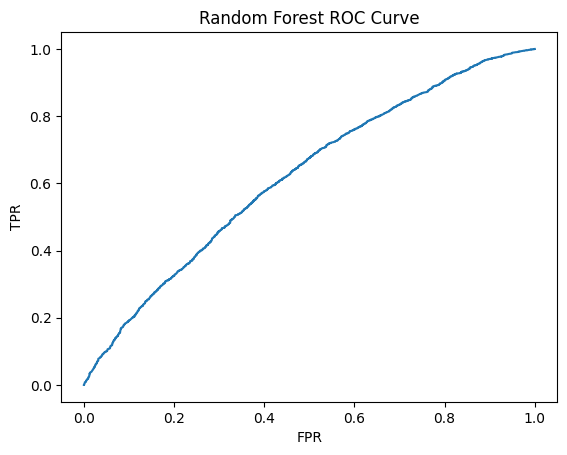

In [ ]:
y_prob = rf.predict_proba(X_test)[:,1]
plot_roc(rf, "Random Forest", X_test, y_prob)

In [ ]:
# confusion matrix
print(pd.crosstab(Y_test, Y_pred_rf, rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted     0     1   All
Actual                     
0           382  1498  1880
1          1192  6026  7218
All        1574  7524  9098


##2i. Random Forest, predict first shot and second shot

In [ ]:
X = player_freethrows.drop(columns=["shot_made", "1of2"])
Y = player_freethrows[["1of2", "shot_made"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1, random_state=1)


# max_accuracy_1 = 0
# max_acc_f_1 = 0
# max_acc_d_1 = 0
# max_accuracy_2 = 0
# max_acc_f_2 = 0
# max_acc_d_2 = 0

# for f in range(15, 23):
#     for d in range(8, 14):
#         rf = RandomForestClassifier(max_features = f, max_depth = d)
#         rf.fit(X_train, Y_train)
#         Y_pred_rf = rf.predict(X_test)

#         accuracy_rf = np.mean(Y_test == Y_pred_rf, axis=0)
#         if accuracy_rf[0] > max_accuracy_1:
#             max_accuracy_1 = accuracy_rf[0]
#             max_acc_f_1 = f
#             max_acc_d_1 = d
#         if accuracy_rf[1] > max_accuracy_2:
#             max_accuracy_2 = accuracy_rf[1]
#             max_acc_f_2 = f
#             max_acc_d_2 = d


# print(f"max accuracy1: {max_accuracy_1}, num features: {max_acc_f_1}, depth: {max_acc_d_1} \n max accuracy2: {max_accuracy_2}, num features: {max_acc_f_2}, depth: {max_acc_d_2}")

# max acc 1of2: 0.831061771817982, num feat:20, depth:11
# max acc 2of2: 0.7998461200263794, num feat:16, depth:10

rf = RandomForestClassifier(max_features = 20, max_depth = 11)
rf.fit(X_train, Y_train)
Y_pred_rf = rf.predict(X_test)
accuracy_rf = np.mean(Y_test == Y_pred_rf, axis=0)
accuracy_rf

1of2         0.831392
shot_made    0.799406
dtype: float64

###Confusion Matrix: 1of2

In [ ]:
print(pd.crosstab(Y_test.loc[:, "1of2"], Y_pred_rf[:, 0], rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted  0.0   1.0   All
Actual                    
0.0        656  1606  2262
1.0        265  6571  6836
All        921  8177  9098


###Confusion Matrix: 2of2

In [ ]:
print(pd.crosstab(Y_test.loc[:, "shot_made"], Y_pred_rf[:, 1], rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted  0.0   1.0   All
Actual                    
0           39  1800  1839
1           36  7223  7259
All         75  9023  9098


###Conf

## 2ii. Multi output Classifier

In [ ]:
from sklearn.multioutput import MultiOutputClassifier

In [ ]:
X = player_freethrows.drop(columns=["shot_made", "1of2"])
Y = player_freethrows[["1of2", "shot_made"]]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1, random_state=1)

max_accuracy_1 = 0
max_acc_f_1 = 0
max_acc_d_1 = 0
max_accuracy_2 = 0
max_acc_f_2 = 0
max_acc_d_2 = 0

# for f in range(19, 21):
#     for d in range(6,15):
#         rf = RandomForestClassifier(max_features = f, max_depth = d)
#         multioutput_classifier = MultiOutputClassifier(rf)
#         multioutput_classifier.fit(X_train, Y_train)
#         Y_pred_moc = multioutput_classifier.predict(X_test)

#         accuracy_rf = np.mean(Y_test == Y_pred_moc, axis=0)
#         if accuracy_rf[0] > max_accuracy_1:
#             max_accuracy_1 = accuracy_rf[0]
#             max_acc_f_1 = f
#             max_acc_d_1 = d
#         if accuracy_rf[1] > max_accuracy_2:
#             max_accuracy_2 = accuracy_rf[1]
#             max_acc_f_2 = f
#             max_acc_d_2 = d


# print(f"max accuracy1: {max_accuracy_1}, num features: {max_acc_f_1}, depth: {max_acc_d_1} \n max accuracy2: {max_accuracy_2}, num features: {max_acc_f_2}, depth: {max_acc_d_2}")

# max acc 1of2: 0.8309518575511101, num feat:20+, depth:12
# max acc 2of2: 0.7996262914926358, num feat:20+, depth:9

rf = RandomForestClassifier(max_features = 20, max_depth = 12)
multioutput_classifier = MultiOutputClassifier(rf)
multioutput_classifier.fit(X_train, Y_train)
Y_pred_moc = multioutput_classifier.predict(X_test)
accuracy_rf = np.mean(Y_test == Y_pred_moc, axis=0)
accuracy_rf

1of2         0.830182
shot_made    0.797208
dtype: float64

## 3. Random Forest, predict the first shot and then use results to predict second shot

In [ ]:
# predicting 1of2
X = player_freethrows.drop(columns=["shot_made", "1of2"])
Y_1of2 = player_freethrows["1of2"]
X_train, X_test, Y_train_1of2, Y_test_1of2 = train_test_split(X, Y_1of2, train_size=0.9, test_size=0.1, random_state=1)


# predict on training data
# rf_shot1 = RandomForestClassifier(max_features = 14, max_depth = 4)

# best num features for train: 31, num features for test: 32, depth:10
# max_accuracy_train = 0
# max_accuracy_test = 0
# max_acc_f_train = 0
# max_acc_d_train = 0
# max_acc_f_test = 0
# max_acc_d_test = 0

# for f in range(16, 25):
#     for d in range(5,10):
#         rf_shot1 = RandomForestClassifier(max_features = f, max_depth = d)
#         rf_shot1.fit(X_train, Y_train_1of2)
#         Y_pred1of2_train = rf_shot1.predict(X_train)
#         Y_pred1of2_test = rf_shot1.predict(X_test)

#         accuracy_train = np.mean(Y_train_1of2 == Y_pred1of2_train)
#         accuracy_test = np.mean(Y_test_1of2 == Y_pred1of2_test)

#         if accuracy_train > max_accuracy_train:
#             max_accuracy_train = accuracy_train
#             max_acc_f_train = f
#             max_acc_d_train = d
#         if accuracy_test > max_accuracy_test:
#             max_accuracy_test = accuracy_test
#             max_acc_f_test = f
#             max_acc_d_test = d

# print(f"max accuracy train: {max_accuracy_train}, num features: {max_acc_f_train}, depth: {max_acc_d_train} \n max accuracy test: {max_accuracy_test}, num features: {max_acc_f_test}, depth: {max_acc_d_test}")


# max accuracy train: 0.8358471440260866, num features: 20, depth: 9
# max accuracy test: 0.8308419432842383, num features: 21, depth: 9

rf_shot1 = RandomForestClassifier(max_features = 21, max_depth = 9)
rf_shot1.fit(X_train, Y_train_1of2)
Y_pred1of2_train = rf_shot1.predict(X_train)
Y_pred1of2_test = rf_shot1.predict(X_test)


# test what happens to accuracy of second shot if first shot prediction accuracy is lower than optimal
# rf_shot1 = RandomForestClassifier(max_features = 16, max_depth = 8)
# rf_shot1.fit(X_train, Y_train_1of2)
# Y_pred1of2_train = rf_shot1.predict(X_train)
# Y_pred1of2_test = rf_shot1.predict(X_test)

In [ ]:
accuracy_train = np.mean(Y_train_1of2 == Y_pred1of2_train)
accuracy_test = np.mean(Y_test_1of2 == Y_pred1of2_test)
accuracy_train, accuracy_test

(0.8353342045163102, 0.8288634864805452)

In [ ]:
print(pd.crosstab(Y_test_1of2, Y_pred1of2_test, rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted   0.0   1.0   All
Actual                     
0.0        1308   954  2262
1.0         603  6233  6836
All        1911  7187  9098


In [ ]:
# training and testing data for 2of2
Y_train_2of2 = player_freethrows.loc[X_train.index]["shot_made"]
X_test["predicted1of2"] = Y_pred1of2_test
Y_test_2of2 = player_freethrows.loc[X_test.index]["shot_made"]
# add predictions to X_train
X_train["predicted1of2"] = Y_pred1of2_train

In [ ]:
# fit new RF
rf_shot2 = RandomForestClassifier(max_features = 16, max_depth = 11)
rf_shot2.fit(X_train, Y_train_2of2)
Y_pred2of2 = rf_shot2.predict(X_test)

# max_accuracy = 0
# max_acc_f = 0
# max_acc_d = 0

# for f in range(16, 25):
#     for d in range(6, 15):
#         rf_shot2 = RandomForestClassifier(max_features = f, max_depth = d)
#         rf_shot2.fit(X_train, Y_train_2of2)
#         Y_pred2of2 = rf_shot2.predict(X_test)

#         accuracy_rf = np.mean(Y_test_2of2 == Y_pred2of2)
#         if accuracy_rf > max_accuracy:
#             max_accuracy = accuracy_rf
#             max_acc_f = f
#             max_acc_d = d


# print(f"max accuracy: {max_accuracy}, num features: {max_acc_f}, depth: {max_acc_d}")


# accuracy when rf1 num features: 21, depth = 9
# 0.7990767201582766, num features: 16, depth = 11
# 0.7986370630907892, num features: 16, depth = 8



# accuracy when rf1 num features: 16, depth = 8
# 0.798746977357661, num features: 19, depth: 9
# 0.7983073202901737, num features: 16, depth = 8

In [ ]:
accuracy = np.mean(Y_test_2of2 == Y_pred2of2)
accuracy

0.7989668058914047

In [ ]:
print(pd.crosstab(Y_test_2of2, Y_pred2of2, rownames=['Actual'], colnames=['Predicted'], margins=True))

Predicted    0     1   All
Actual                    
0           70  1769  1839
1           60  7199  7259
All        130  8968  9098


# Visualization

In [ ]:
player_freethrows11 = player_freethrows[(player_freethrows["num_throws"] == 1) & (player_freethrows["throw_index"] == 1)]
player_freethrows12 = player_freethrows[(player_freethrows["num_throws"] == 2) & (player_freethrows["throw_index"] == 1)]
player_freethrows22 = player_freethrows[(player_freethrows["num_throws"] == 2) & (player_freethrows["throw_index"] == 2)]
player_freethrows13 = player_freethrows[(player_freethrows["num_throws"] == 3) & (player_freethrows["throw_index"] == 1)]
player_freethrows23 = player_freethrows[(player_freethrows["num_throws"] == 3) & (player_freethrows["throw_index"] == 2)]
player_freethrows33 = player_freethrows[(player_freethrows["num_throws"] == 3) & (player_freethrows["throw_index"] == 3)]

In [ ]:
sns.kdeplot(data=player_freethrows11, x="player_weight", hue="shot_made").set_title("Free Throw by Weight")
sns.kdeplot(data=player_freethrows12, x="player_weight", hue="shot_made")
sns.kdeplot(data=player_freethrows22, x="player_weight", hue="shot_made")
sns.kdeplot(data=player_freethrows13, x="player_weight", hue="shot_made")
sns.kdeplot(data=player_freethrows23, x="player_weight", hue="shot_made")
sns.kdeplot(data=player_freethrows33, x="player_weight", hue="shot_made")
plt.xlabel("Weight")
plt.legend(['Shot Made','Shot Missed'])

In [ ]:
sns.kdeplot(data=player_freethrows11, x="player_weight", hue="shot_made").set_title("Free Throw by Weight when awarded 1 or 2 Free Throws")
sns.kdeplot(data=player_freethrows12, x="player_weight", hue="shot_made")
sns.kdeplot(data=player_freethrows22, x="player_weight", hue="shot_made")
plt.xlabel("Weight")
plt.legend(['Shot Made','Shot Missed'])

In [ ]:
sns.kdeplot(data=player_freethrows13, x="player_weight", hue="shot_made").set_title("Free Throw by Weight when awarded 3 Free Throws")
sns.kdeplot(data=player_freethrows23, x="player_weight", hue="shot_made")
sns.kdeplot(data=player_freethrows33, x="player_weight", hue="shot_made")
plt.xlabel("Weight")
plt.legend(['Shot Made','Shot Missed'])

In [ ]:
sns.kdeplot(data=player_freethrows11, x="player_height", hue="shot_made").set_title("Free Throw by Height")
sns.kdeplot(data=player_freethrows12, x="player_height", hue="shot_made")
sns.kdeplot(data=player_freethrows22, x="player_height", hue="shot_made")
sns.kdeplot(data=player_freethrows13, x="player_height", hue="shot_made")
sns.kdeplot(data=player_freethrows23, x="player_height", hue="shot_made")
sns.kdeplot(data=player_freethrows33, x="player_height", hue="shot_made")
plt.xlabel("Height")
plt.legend(['Shot Made','Shot Missed'])

In [ ]:
sns.kdeplot(data=player_freethrows11, x="player_height", hue="shot_made").set_title("Free Throw by Height when awarded 1 or 2 Free Throws")
sns.kdeplot(data=player_freethrows12, x="player_height", hue="shot_made")
sns.kdeplot(data=player_freethrows22, x="player_height", hue="shot_made")
plt.xlabel("Height")
plt.legend(['Shot Made','Shot Missed'])

In [ ]:
sns.kdeplot(data=player_freethrows13, x="player_height", hue="shot_made").set_title("Free Throw by Height when awarded 3 Free Throws")
sns.kdeplot(data=player_freethrows23, x="player_height", hue="shot_made")
sns.kdeplot(data=player_freethrows33, x="player_height", hue="shot_made")
plt.xlabel("Height")
plt.legend(['Shot Made','Shot Missed'])

In [ ]:
# TODO: Visualizations period/playoff on scored
sns.kdeplot(data=player_freethrows11, x="exp", hue="shot_made").set_title("Free Throw by Player Experience")
sns.kdeplot(data=player_freethrows12, x="exp", hue="shot_made")
sns.kdeplot(data=player_freethrows22, x="exp", hue="shot_made")
sns.kdeplot(data=player_freethrows13, x="exp", hue="shot_made")
sns.kdeplot(data=player_freethrows23, x="exp", hue="shot_made")
sns.kdeplot(data=player_freethrows33, x="exp", hue="shot_made")
plt.xlabel("Experience")
plt.legend(['Shot Made','Shot Missed'])

In [ ]:
sns.kdeplot(data=player_freethrows11, x="exp", hue="shot_made").set_title("Free Throw by Player Experience when awarded 1 or 2 Free Throws")
sns.kdeplot(data=player_freethrows12, x="exp", hue="shot_made")
sns.kdeplot(data=player_freethrows22, x="exp", hue="shot_made")
plt.xlabel("Experience")
plt.legend(['Shot Made','Shot Missed'])

In [ ]:
sns.kdeplot(data=player_freethrows13, x="exp", hue="shot_made").set_title("Free Throw by Player Experience when awarded 3 Free Throws")
sns.kdeplot(data=player_freethrows23, x="exp", hue="shot_made")
sns.kdeplot(data=player_freethrows33, x="exp", hue="shot_made")
plt.xlabel("Experience")
plt.legend(['Shot Made','Shot Missed'])

In [ ]:
freethrows_group_index

In [ ]:
any(freethrows_group_index["period"]>4)

In [ ]:
temp_freethrows_gi = freethrows_group_index[freethrows_group_index["simp_pct"] <= 1]

In [ ]:
def jitter(values):
    return values + np.random.normal(0,0.025,values.shape)

In [ ]:
sns.scatterplot(x=jitter(temp_freethrows_gi["period"]), y=jitter(temp_freethrows_gi["simp_pct"]), alpha = 0.2)
plt.title("Play Accuracy per Minute")
plt.ylabel("Accuracy")
plt.xlabel("Period");

In [ ]:
per_acc = temp_freethrows_gi.pivot_table(index="simp_pct", columns="period", aggfunc = "size", fill_value=0)
per_acc = per_acc.sort_index(ascending=False)
per_acc

In [ ]:
sns.heatmap(per_acc);